# Entrega 1: Ejercicio 1. Parte 1.

**Asignatura**: Machine Learning, 2025/2026

**Profesora**: Raquel España

**Máster de Inteligencia Artificial**
**Autores:**  
- Jesús Guirado Pérez  
- Antonio Luis Sánchez Torres  
- Víctor Emilio Vicente García

# Índice
1. [Introducción](#introducción)
   1. [Problema](#problema)
   2. [Metodología](#metodología)
2. [Dataset](#dataset)
3. [Preprocesado Básico](#preprocesado-básico)
   1. [Lectura de datos y análisis superficial](#lectura-de-datos-y-análisis-superficial)
   2. [Tratamiento de cadenas de texto](#tratamiento-de-cadenas-de-texto)
   3. [Tratamiento de nulos](#tratamiento-de-nulos)
   4. [Varianza](#varianza)
4. [Estrategias de Evaluación]()
5. [Modelos linea Base](#modelos-linea-base)
   1. [Decision Tree](#decision-tree)
   2. [Random Forest](#random-forest)
   3. [AdaBoost](#adaboost)
6. [Estrategias de preprocesado avanzado](#estrategias-de-preprocesado-avanzado)
   1. [Valores atípicos](#valores-atípicos)
7. [Entrenamiento con preprocesado](#entrenamiento-con-preprocesado)
   1. [Decision Tree](#decision-tree-1)
   2. [Random Forest](#random-forest-1)
   3. [AdaBoost](#adaboost-1)
8. [Búsqueda de hyper parámetros]()
   1. [Decision Tree]()
   2. [Random Forest]()
   3. [AdaBoost]()
9.  [Selección de características e hyper parámetros]()
    1.  [Decision Tree]()
    2.  [Random Forest]()
    3.  [AdaBoost]()
10. [Comparativa de resultados final]()
11. [Conclusión]()
    
 [Uso de IA Generativa]()

 [Entorno de Ejecución]()

# Introducción <a name="introducción"></a>
La consejería de educación nos ha pedido realizar un análisis sobre la prevención del bullying. Tenemos como tarea crear un sistema fiable de predicción del bullyinng en base a dos datasets.

## Problema <a name="problema"></a>
En este problema tenemos una clasificación binaria entre dos clases en nuestra variable objetivo, sufre bullying o no sufre bullying. Para ello nos han dado un dataset. Además de generar un clasificador binario que ayude en la toma de decisiones y prevención del bullying, hay que generar un informe que puedan entender personal no técnico, subrayando entre otros las variables más importantes para resolver el problema.

## Metodología <a name="metodología"></a>
En este proyecto 

# Preprocesado Básico <a name="preprocesado-básico"></a>

## Lectura de datos y análisis superficial <a name="lectura-de-datos-y-análisis-superficial"></a>

Leeremos los datos del dataset descargado para la práctica y revisaremos superficialmente de cuantas filas, columnas, nulos y tipos tenga el dataset.

In [1]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


#Semilla establecida
semilla=123
np.random.seed(semilla)


# Cargamos la base de datos de bullying1.csv
# ==============================================================================
url = ( './Bullying/Bullying1.csv')
bullying = pd.read_csv(url, sep=',')
# Damos un vistazo rápido sobre cómo está construido el dataset en las primeras 3 filas
bullying.head(3)

,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero,Tipo_Centro,Sufre_Bullying
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,Femenino,Publico,No
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,Femenino,Publico,Si
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,Femenino,Privado,No


Leemos el dataset Byllying1.csv, separando por comas puesto que así está construido este dataset.

In [2]:
# información del dataset mostrando el nombre de cada columna, su tipo, y de cuántas filas tiene el dataset y cada una de las variables, siendo con estas ultimas la cantidad de no nulas 
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   1900 non-null   float64
 1   Horas_Sueno            2000 non-null   float64
 2   Notas_Promedio         2000 non-null   float64
 3   Numero_Amigos          1900 non-null   float64
 4   Tiempo_Videojuegos     2000 non-null   float64
 5   Tiempo_Redes           2000 non-null   float64
 6   Actividades_Extracurr  2000 non-null   int64  
 7   Ausencias_Escolares    2000 non-null   int64  
 8   Autoestima             2000 non-null   float64
 9   Ansiedad               2000 non-null   float64
 10  Depresion              2000 non-null   float64
 11  Conflictos_Familiares  2000 non-null   int64  
 12  Tiempo_Internet        2000 non-null   float64
 13  Actividad_Fisica       2000 non-null   float64
 14  Genero                 2000 non-null   object 
 15  Tipo

Podemos ver como nuestra base de datos está constituida por 17 columnas y 2000 filas, y que las unicas variables con nulos son "Edad" y "Numero Amigos" puesto que como podemos ver, tenemos 2000 entradas, de las cuales todas las variables tienen 2000 entradas no nulas, excepto las dos variables mencionadas, las cuales tienen 1900 entradas no nulas cada una, es decir, 100 nulos cada una.

## Tratamiento de cadenas de texto <a name="tratamiento-de-cadenas-de-texto"></a>


Podemos ver como hay 3 columnas tipo object, y como los modelos no entienden de string las pasaremos a numérica, más específicamente dummies, por lo tanto lo que haremos a continuación es seleccionar estos object y transformarlos a dummies.

In [3]:
#Seleccionamos las columnas categóricas y las mostramos
categoricas = bullying.select_dtypes(include = ["object", "category"]).columns
categoricas

Index(['Genero', 'Tipo_Centro', 'Sufre_Bullying'], dtype='object')

Tenemos los object, Genero Tipo_centro y Sufre_Bullying, cogidos en la variable "categoricas".

In [4]:
#Transformamos las categóricas a dummies, eliminando la primera columna de cada variable categórica, haciendo que desaparezca la colinealidad, combinación lineal de varias columnas para formar otra.
categoricas_Datos = pd.get_dummies(bullying[categoricas], drop_first = True)
# Mostramos la transformación de las variables categóricas en variables dummies
categoricas_Datos.head()

,Genero_Masculino,Tipo_Centro_Publico,Sufre_Bullying_Si
0,False,True,False
1,False,True,True
2,False,False,False
3,True,False,True
4,False,False,True


Como las variables categóricas de nuestro dataset son de dos valores, en Genero tenemos Femenino y Masculino, en Tipo_Centro tenemos Privado y Publico, y en Sufre_Bullying tenemos No y Si, entonces eliminamos el primero de los dos valores que formarían una nueva columna y como hemos visto los 3 object no tienen nulos, por lo que no creamos columnas con nulos por cada variable categorica. Por lo tanto, creamos 3 columnas que las guardamos en la variable "categoricas_Datos".

In [5]:
bullying.drop(categoricas, axis = 1, inplace = True)
# Tras eliminar los atributos originales, concatenamos los nuevos atributos creados para las variables categóricas.
bullying = pd.concat([bullying, categoricas_Datos], axis = 1)
# Mostramos como quedan los datos de nuevo.
bullying.head()

,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero_Masculino,Tipo_Centro_Publico,Sufre_Bullying_Si
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,False,True,False
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,False,True,True
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,False,False,False
3,16.0,9.2,6.8,4.0,2.5,0.9,0,21,3.0,9.3,7.3,9,0.0,3.6,True,False,True
4,16.0,6.6,7.6,2.0,4.5,9.6,4,29,8.2,2.1,6.8,4,7.4,0.4,False,False,True


Eliminamos las categorias que coincidan en nombre con las originales, ya que ya nos son completamente inútiles y concatenamos las columnas nuevas que hemos generado en "categoricas_Datos".

In [6]:
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   1900 non-null   float64
 1   Horas_Sueno            2000 non-null   float64
 2   Notas_Promedio         2000 non-null   float64
 3   Numero_Amigos          1900 non-null   float64
 4   Tiempo_Videojuegos     2000 non-null   float64
 5   Tiempo_Redes           2000 non-null   float64
 6   Actividades_Extracurr  2000 non-null   int64  
 7   Ausencias_Escolares    2000 non-null   int64  
 8   Autoestima             2000 non-null   float64
 9   Ansiedad               2000 non-null   float64
 10  Depresion              2000 non-null   float64
 11  Conflictos_Familiares  2000 non-null   int64  
 12  Tiempo_Internet        2000 non-null   float64
 13  Actividad_Fisica       2000 non-null   float64
 14  Genero_Masculino       2000 non-null   bool   
 15  Tipo

Por lo tanto tenemos 17 columnas y 2000 filas.

## Tratamiento de nulos <a name="tratamiento-de-nulos"></a>

Como podemos ver, tenemos que tratar los nulos de la columna "Edad" y "Numero_Amigos", como las dos son variables del tipo "float64" hemos decidido realizar una sustitución por mediana, ya que es más robusta a los outliers que la media.

In [7]:
from sklearn.impute import SimpleImputer
# strategy=median porque utilizamos la mediana
imputer = SimpleImputer(strategy="median")
# seleccionamos las columnas con nulos, las cuales queremos calcular su mediana y sustituir los nulos por
nulos = ["Edad", "Numero_Amigos"]
# Sustituimos las columnas elegidas, calculando la mediana con fit y cambiando los nulos por con el valor de fit utilizando transform
bullying[nulos] = imputer.fit_transform(bullying[nulos])

Para ello utilizaremos SimpleImputer, ya que esta función guardará la mediana de cada característica, que se utilizará para reemplazar los valores nulos de las columnas correspondientes. Por lo tanto, hacemos un fit_transform sobre las columnas con valores nulos, para que calcule la mediana de cada columna y se sustituyan los nulos de cada variable.

In [8]:
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   2000 non-null   float64
 1   Horas_Sueno            2000 non-null   float64
 2   Notas_Promedio         2000 non-null   float64
 3   Numero_Amigos          2000 non-null   float64
 4   Tiempo_Videojuegos     2000 non-null   float64
 5   Tiempo_Redes           2000 non-null   float64
 6   Actividades_Extracurr  2000 non-null   int64  
 7   Ausencias_Escolares    2000 non-null   int64  
 8   Autoestima             2000 non-null   float64
 9   Ansiedad               2000 non-null   float64
 10  Depresion              2000 non-null   float64
 11  Conflictos_Familiares  2000 non-null   int64  
 12  Tiempo_Internet        2000 non-null   float64
 13  Actividad_Fisica       2000 non-null   float64
 14  Genero_Masculino       2000 non-null   bool   
 15  Tipo

Podemos ver como, efectivamente, ya no existen nulos en las dos variables, "Edad" y "Numero_Amigos"

## Varianza <a name="varianza"></a>

Analizamos primero la varianza del dataset, puesto que si la varianza de alguna columna es 0 no aportará nada a nuestro dataset y podremos eliminarlo perfectamente

In [9]:
# Calculamos la variedad de valores que hay en cada una de las columnas, cuanto mayor sea, mayor variedad y más grande sera su varianza
varianza = bullying.var()
varianza

Edad                      2.815383
Horas_Sueno               2.940628
Notas_Promedio            8.242327
Numero_Amigos            17.429875
Tiempo_Videojuegos        2.961563
Tiempo_Redes              8.083199
Actividades_Extracurr     1.998599
Ausencias_Escolares      74.529713
Autoestima               46.981344
Ansiedad                 46.082167
Depresion                 8.468326
Conflictos_Familiares     7.964772
Tiempo_Internet          12.026210
Actividad_Fisica          4.177683
Genero_Masculino          0.250109
Tipo_Centro_Publico       0.250053
Sufre_Bullying_Si         0.228210
dtype: float64

Analizando los datos, aunque no hay ninguna variable a 0, hay 2 variables que se quedan muy próximas a 0 como "Genero_Masculino" y "Tipo_Centro_Publico", que analizaremos más adelante en el apartado de "Selección de características". Hay que tener en cuenta que estas dos variables solo pueden tomar dos valores, "True" o "False", por lo que al no haber mucha variedad de valores en estas variables, se quedan muy próximas a 0.

## Tabla de correlación

Realizamos este análisis puesto que queremos saber que variables aportan utilidad al problema y cuáles están excesivamente correlacionadas para eliminarlas del conjunto de datos, ya que si hay dos variables muy correlacionadas entre sí, los modelos pueden sobreaprender los datos, bajando su valor de predicción

In [10]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes, para luego entrenar nuestro modelo e intentar predecir 
matriz_correlacion = bullying.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Sufre_Bullying_Si"].sort_values(ascending=False)

Sufre_Bullying_Si        1.000000
Tiempo_Internet          0.222116
Notas_Promedio           0.118079
Ansiedad                 0.107880
Conflictos_Familiares    0.081554
Tiempo_Redes             0.052044
Depresion                0.032933
Edad                     0.029757
Actividad_Fisica         0.019360
Genero_Masculino         0.002479
Tipo_Centro_Publico     -0.002061
Actividades_Extracurr   -0.005985
Tiempo_Videojuegos      -0.010141
Ausencias_Escolares     -0.012196
Horas_Sueno             -0.053791
Numero_Amigos           -0.069401
Autoestima              -0.075810
Name: Sufre_Bullying_Si, dtype: float64

Analizando los datos, podemos ver que no hay ninguna columna que sea realmente importante para nuestra columna objetivo. Aun así, podemos observar que "Tiempo_Internet", "Notas_Promedio" y "Ansiedad" constituyen una parte considerable con respecto a nuestra variable objetivo. En cambio, parece que las columnas "Genero_Masculino", "Tipo_Centro_Publico" y "Actividades_Extracurr" no aportarán mucho aprendizaje útil cuando analicemos los modelos del dataset.

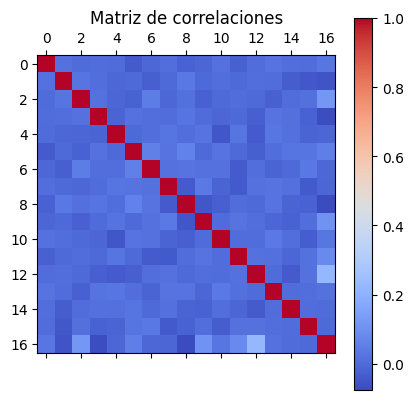

In [11]:
# Mediante un mapa de calor analizamos la matriz de correlación donde los colores van de azul a rojo, dependiendo del grado de correlación entre variables
plt.matshow(bullying.corr(), cmap="coolwarm")
# Añadimos el título "Matriz de correlaciones"
plt.title("Matriz de correlaciones")
# Añadimos una barra de color como leyenda
plt.colorbar()
# Mostramos la gráfica
plt.show()


Podemos ver como el mapa de calor solo muestra colores fríos y ningún color cálido, lo que indica que al igual que sucedía con la variable objetivo, no hay mucha dependencia entre variables, por lo tanto, no eliminaremos ninguna columna según sus correlaciones.

# Modelos linea base <a name="modelos-linea-base"></a>

Puesto que hemos hecho los arreglos básicos para que los modelos no tengan problemas a la hora de ser entrenados con el dataset, decidimos proceder con el entrenamiento. Cosas como eliminar outliers y selección de características decidimos abordarlas después para así saber que realmente mejoran el modelo o no. Esto se debe a que, en algunos casos, algunas características u outliers podrían beneficiarnos más que perjudicarnos.

In [12]:
#Importamos varias librerias que podrían ayudarnos a la hora de seguir con nuestros modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying.drop("Sufre_Bullying_Si", axis=1)
y=bullying["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

Realizada la división, utilizaremos 3 modelos de , puesto que el objetivo es saber si una persona sufre o no bullying. Por lo tanto, es una clasificación supervisada binaria, estos modelos serán: Decision Tree, Random Forest y SVM.

Utilizaremos el código que utilizó la profesora para calcular las métricas y predicciones de los modelos que utilizaremos.

In [13]:
# Importamos la clase matriz confusión 
# Importación de los métodos requeridos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Importante poner para que se muestren los gráficos
%matplotlib inline
# Definimos una función para utilizarla posteriormente

def obtencion_metricas_clasificacion(Entradas, modelo, Salidas_verdaderas):
    '''Obtención de las métricas de clasificación'''
    # Salidas predichas por el modelo y las salidas verdaderas
    Salidas_predichas = modelo.predict(Entradas)
    # Matriz de confusión para visualizar aciertos y errores, ordenada primero con los falsos y segundo con los verdaderos
    labels = [False, True]
    matriz_confusion = confusion_matrix(Salidas_verdaderas, Salidas_predichas, labels=labels)
    print("La matriz de confusión es:")
    print(matriz_confusion)

    # Métricas que analizaremos en nuestros modelos
    exactitud = accuracy_score(Salidas_verdaderas, Salidas_predichas)
    precision = precision_score(Salidas_verdaderas, Salidas_predichas)
    sensibilidad_recall = recall_score(Salidas_verdaderas, Salidas_predichas)
    puntuacion_f1 = f1_score(Salidas_verdaderas, Salidas_predichas)

    # Cantidad de decimales que tendrá cada impresión
    digitos = 4
    print("La exactitud es: ")
    print(round(exactitud,digitos))
    print("La precisión es:")
    print(round(precision,digitos))
    print("La sensibilidad es:")
    print(round(sensibilidad_recall,digitos))
    print("La puntuación F1 es:")
    print(round(puntuacion_f1,digitos))

Sobre lo que imprime esta función nos centraremos sobre todo en la matriz de confusión, ya que aporta mucha información de cómo funciona el modelo sobre los datos. Además de que la métrica prioritaria será para nosotros la sensibilidad, puesto que se nos pide como objetivo pelear contra el bullying, por lo tanto el peor caso es que se prediga que los estudiantes no sufren bullying, y en realidad si lo sufran, y para ello, la sensibilidad al estar influenciada inversamente por los Falsos Negativos, buscaremos maximizarla, buscando así los verdaderos positivos.

## Decision Tree <a name="decision-tree"></a>

Utilizamos árboles de decisión porque son unos de los modelos más interepretables, ya que su estructura basada en reglas permite visualizar con facilidad cómo el modelo toma sus decisiones. Facilitando su analisis de comportamiento y ajuste de hiperparámetros para mejorar el rendimiento.

In [14]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 15
Número de nodos terminales: 160


In [15]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[225  34]
 [ 34 107]]
La exactitud es: 
0.83
La precisión es:
0.7589
La sensibilidad es:
0.7589
La puntuación F1 es:
0.7589


Estos resultados son muy interesantes. Si nos centramos en la matriz de confusión podemos ver como, primero, hay un desbalanceo de los datos, puesto que hay 259 valores reales con "no bullying" (suma de "no" reales) a diferencia de los 141 que son "si bullying" (suma de "si" reales), los cuales deberemos corregir.

Además, dado que queremos combatir contra el bullying, deberemos tener en cuenta que los 34 Falsos Negativos(se predijo que 34 alumnos no sufren bullying, pero en realidad si lo sufren), que componen un 8.5% de los resultados, son los datos más importantes y que debemos buscar la forma de reducirlos.

Para terminar, su sensibilidad es del 75.89%, que buscaremos maximizar.

## Random Forest <a name="random-forest"></a>

Utilizaremos Random Forest puesto que es un ensamble de tipo Bagging que utiliza varios árboles de decisión.

Esto es así debido a que cada árbol de decisión entrenará con un subconjunto aleatorio del conjunto de datos de entrenamiento, pudiendose repetir valores o no (Bootstrap).

Cada uno de los árboles que forma el bosque, funciona de forma independiente, pero luego junta su valor con el resto de árboles, y entonces eligen entre todos el valor que más se repite entre todos (Agregación).

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[232  27]
 [ 42  99]]
La exactitud es: 
0.8275
La precisión es:
0.7857
La sensibilidad es:
0.7021
La puntuación F1 es:
0.7416


Como primera aproximación, podemos ver como Random Forest, pese a ser un conjunto de árboles de decisiones, funciona peor que un árbol de decisión, ya que podemos ver que el número de estudiantes que sufren bullying y nuestro modelo ha predicho que "no" ha aumentado en 8 estudiantes más, lo cual es lo que intentamos evitar en todo momento.

Podemos ver como sensibilidad es bastante inferior al árbol de decisión, bajando de un 75.89% a un 70.21%, haciendo así que no sea muy bueno modelo, de momento, para nuestro dataset.

## AdaBoost <a name="adaboost"></a>

Adaboost es un ensamble del tipo sucesivo, en el cual ejecuta un modelo simple y, de las muestras clasificadas de forma errónea, lo ejecuta otro modelo igual.En este proceso, la importancia de los errores dependerá del "learning_rate" y el número de modelos que ejecutarán el dataset dependerá del "n_estimators".

Para este caso, hemos elegido hacer el AdaBoost del arbol de decisiones que hemos creado antes, porque nos resulta interesante ver como cambia el valor al ejecutar el ensamble con respecto al modelo original.

In [17]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[222  37]
 [ 34 107]]
La exactitud es: 
0.8225
La precisión es:
0.7431
La sensibilidad es:
0.7589
La puntuación F1 es:
0.7509


Podemos ver como Adaboost con el árbol de decisiones creado anteriormente da resultados similares o un poco inferiores al modelo original. Es importante destacar que, en esta etapa, estamos utilizando valores por defecto porque queremos tener modelos base que nos sirvan para saber que si seguimos tocando datos, lo estamos mejorando o empeorando. Por ello no hemos hecho ninguna búsqueda de hiperparámetros, o validación cruzada.

Su sensibilidad es la misma que el árbol de decisiones, un 75.89%, un resultado que intentaremos maximizar junto al resto de nuestros modelos.

# Estrategias de preprocesado avanzado <a name="estrategias-de-preprocesado-avanzado"></a>

Una vez obtenidos los resultados, vamos a revisar y eliminar los outliers, hacer selección de características y por último hacer balanceo de datos, ya que por lo que hemos visto, hay un desbalanceo considerable en la variable objetivo.

## Valores atípicos <a name="valores-atípicos"></a>

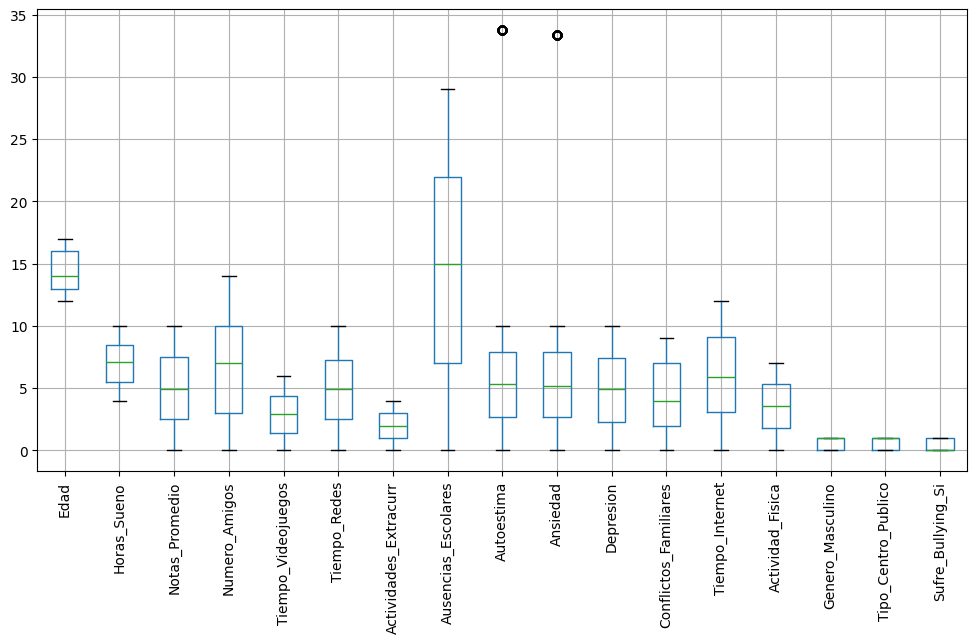

In [18]:
# Aumenta el tamaño del boxplot de la figura
bullying.boxplot(figsize=(12,6))
# Rotamos los nombres en el eje x a 90º
plt.xticks(rotation=90)
# Muestra la gráfica
plt.show()

Aunauq en el boxplot podemos visualizar dos outliers, uno en la columna "Autoestima" y otro en la columna "Ansiedad", en realidad si vemos la base de datos, podemos ver como en realidad hay 100 outliers en cada columna, haciendo que al coincidir los valores solo se vean como dos en el boxplot.

In [19]:
# Marcamos como NaN los valores que estén entre 30 y 35
bullying.loc[bullying['Autoestima'].between(30, 35), 'Autoestima'] = np.nan
bullying.loc[bullying['Ansiedad'].between(30, 35), 'Ansiedad'] = np.nan

# Creamos el imputador
imputer = SimpleImputer(strategy="median")

# Aplicamos a ambas columnas a la vez
bullying[['Autoestima', 'Ansiedad']] = imputer.fit_transform(bullying[['Autoestima', 'Ansiedad']])


Convertimos todos los valores entre 30 y 35 de estas dos columnas (outliers), a través de la mediana.

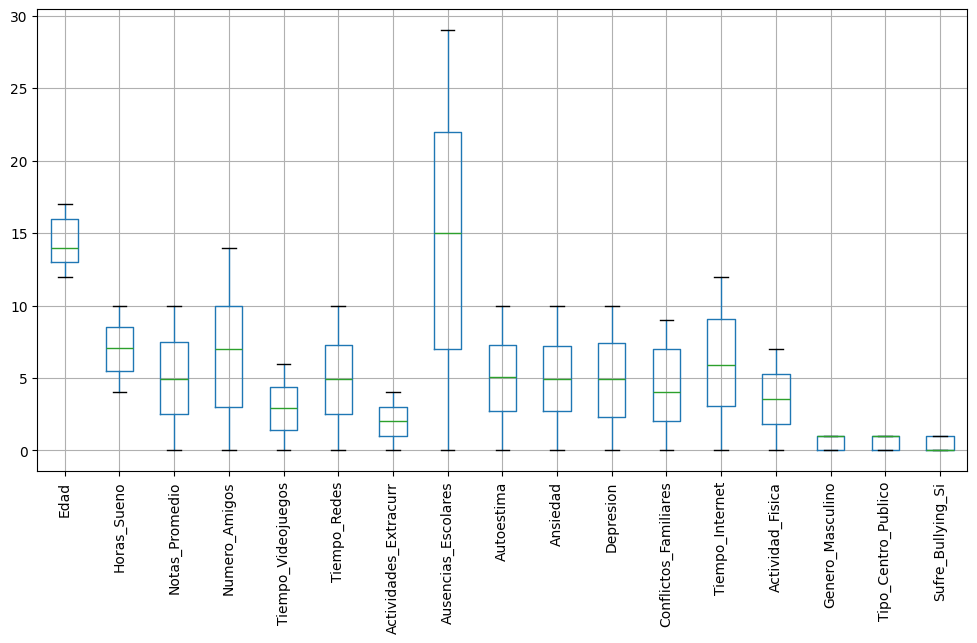

In [20]:
# Aumenta el tamaño del boxplot de la figura
bullying.boxplot(figsize=(12,6))
# Rotamos los nombres en el eje x a 90º
plt.xticks(rotation=90)
# Muestra la gráfica
plt.show()

Vemos como hemos sustituido los outliers por la mediana, por lo que ya no hay outliers.

# Entrenamiento con preprocesado <a name="entrenamiento-con-preprocesado"></a>

Después de aplicar la selección de características, nuestros modelos deberían de mejorar sus resultados, puesto que al haber menos datos inútiles, reduce el sobreajuste al haber menos complejidad en los datos, al mejorar sus predicciones y al no sobreaprender.

Hacemos la misma división con la misma semilla, para que no haya dudas de los resultados.

In [21]:
#Importamos varias librerias que podrían ayudarnos a la hora de seguir con nuestros modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying.drop("Sufre_Bullying_Si", axis=1)
y=bullying["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

## Decision Tree <a name="decision-tree-1"></a>

Utilizamos el mismo árbol de decisiones que antes.

In [22]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 15
Número de nodos terminales: 164


Podemos ver como ha habido un cambio mínimo en el número de nodos terminales.

In [23]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[224  35]
 [ 33 108]]
La exactitud es: 
0.83
La precisión es:
0.7552
La sensibilidad es:
0.766
La puntuación F1 es:
0.7606


Si comparamos los resultados con el anterior Decision Tree, pese a que la única diferencia ha sido la selección de datos, ha habido un ligero empeoramiento. En la matriz de confusión, que ahora en vez de 34 alumnos que predicía como que no sufrían bullying, cuando en realidad lo sufren, ha pasado a 36.

La sensibilidad también ha empeorado a un 74.47%. 

## Random Forest <a name="random-forest-1"></a>

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[225  34]
 [ 35 106]]
La exactitud es: 
0.8275
La precisión es:
0.7571
La sensibilidad es:
0.7518
La puntuación F1 es:
0.7544


Podemos ver como en el caso de Random Forest, los resultados han mejorado ligeramente con respecto al modelo original, pasando de 42 FN a 35, y la sensibilidad que antes tenía un valor de 70.21% ha pasado a 75.18%.

Este modelo parece mejor que el modelo Decision Tree según los resultados obtenidos.

## AdaBoost <a name="adaboost-1"></a>

In [25]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[225  34]
 [ 38 103]]
La exactitud es: 
0.82
La precisión es:
0.7518
La sensibilidad es:
0.7305
La puntuación F1 es:
0.741


Aquí podemos ver como AdaBoost ha empeorado con respecto a su uso anterior, puesto que ha pasado de 34 Falsos Negativos a 38, haciendo así que su sensibilidad ha pasado de un 75.09% a un 73.57%

# Selección de características

Realizaremos una selección de características para saber si hay columnas que no solo no aportan nada a nuestros modelos, si no que incluso introducen ruido, que hace que los modelos aprendan cosas incorrectas y sus predicciones empeoren.

Para ello lo primero que haremos es mirar la correlación que tienen nuestras variables con respecto a nuestra variable objetivo "Sufre_Bulling_Si", ya que como vimos anteriormente en la varianza, hay 2 variables, "Tipo_Centro_Publico" y "Genero_Masculino", que tienen varianza muy cercana a 0, y vamos a analizar sus valores además del resto de características.

In [26]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = bullying.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Sufre_Bullying_Si"].sort_values(ascending=False)

Sufre_Bullying_Si        1.000000
Ansiedad                 0.330236
Tiempo_Internet          0.222116
Notas_Promedio           0.118079
Conflictos_Familiares    0.081554
Tiempo_Redes             0.052044
Depresion                0.032933
Edad                     0.029757
Actividad_Fisica         0.019360
Genero_Masculino         0.002479
Tipo_Centro_Publico     -0.002061
Actividades_Extracurr   -0.005985
Tiempo_Videojuegos      -0.010141
Ausencias_Escolares     -0.012196
Horas_Sueno             -0.053791
Numero_Amigos           -0.069401
Autoestima              -0.162548
Name: Sufre_Bullying_Si, dtype: float64

En la correlación se puede ver las variables que más influyen y las que menos en la variable objetivo, las ordenaremos de mayor a menor: "Ansiedad", "Tiempo_Internet", "Autoestima", "Notas_Promedio", "Conflictos_Familiares", "Numero_amigos", "Horas_Sueno", "Tiempo_Redes", "Depresion", "Edad", "Actividad_Fisica", "Ausencias_escolares", "Tiempo_Videojuegos", "Actividades_Extracurr", "Genero_Masculino", "Tipo_Centro_Publico".

Por lo tanto podemos confirmar una vez más, que las variables "Genero_Masculino" y "Tipo_Centro_Publico" parece que no ayudan a nuestros modelos, además de que se puede ver otra variable que tampoco aporta nada, la variable "Actividades_Extracurr", para ello vamos a ver unos histogramas para ver como estan distribuidos los valores en estas 3 variables.

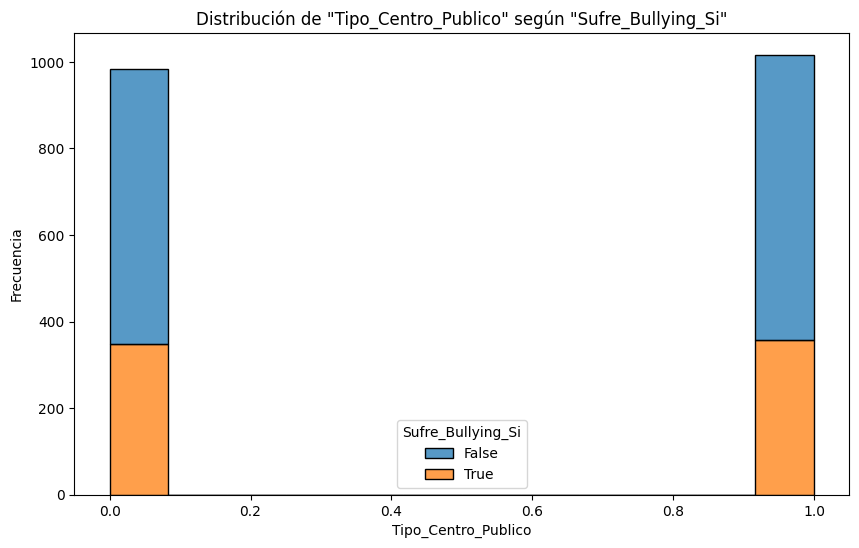

In [27]:
import seaborn as sns

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=bullying, x='Tipo_Centro_Publico', hue='Sufre_Bullying_Si', multiple='stack', kde=False)
plt.title('Distribución de "Tipo_Centro_Publico" según "Sufre_Bullying_Si"')
plt.xlabel('Tipo_Centro_Publico')
plt.ylabel('Frecuencia')
plt.show()

Viendo el histograma de la variable "Tipo_Centro_Publico" con respecto a la variable objetivo "Sufre_Bullying_Si" podemos ver como los dos tipos de centro, publico y privado, disponen de una distribución muy similares en falsos y aciertos, casi en la misma cantidad de datos. Por lo tanto, vemos como esta variable, una vez más, parece completamente inútil, o incluso perjudicial (ruido) para nuestros modelos.

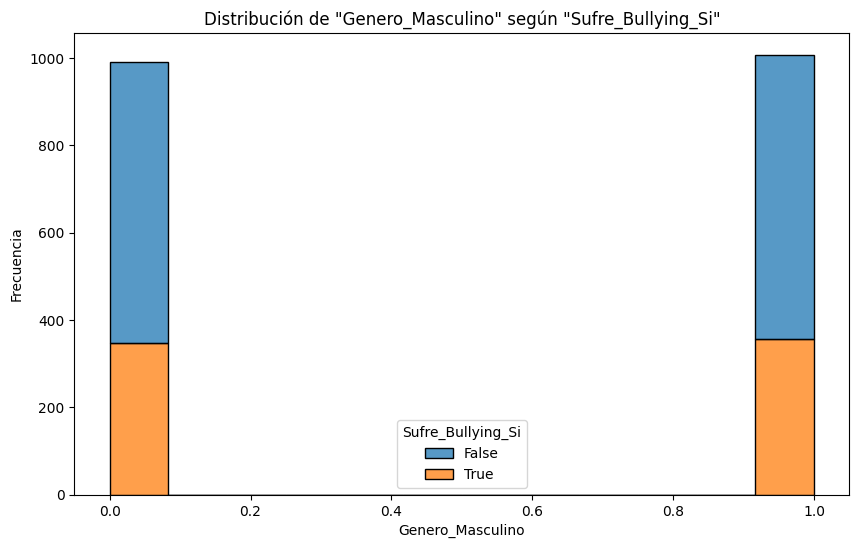

In [28]:
import seaborn as sns

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=bullying, x='Genero_Masculino', hue='Sufre_Bullying_Si', multiple='stack', kde=False)
plt.title('Distribución de "Genero_Masculino" según "Sufre_Bullying_Si"')
plt.xlabel('Genero_Masculino')
plt.ylabel('Frecuencia')
plt.show()

Viendo el histograma de la variable "Genero_Masculino" con respecto a la variable objetivo "Sufre_Bullying_si" vemos, como sucede en el histograma anterior, que sucede algo muy parecido, misma distribución de datos en las dos variables de Genero_Masculino. Por lo tanto, como sucede antes, esta variable una vez más demuestra lo inútil o inluso perjudicial (ruido) que puede ser para nuestros modelos.

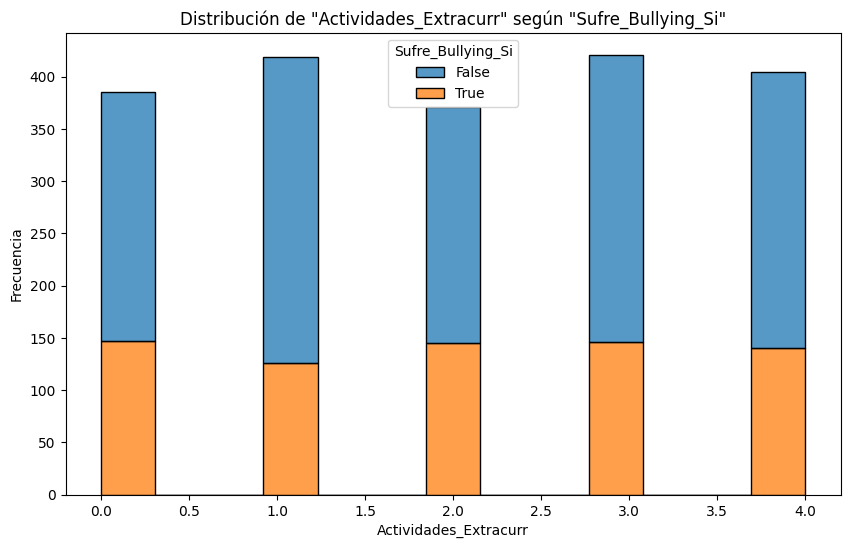

In [29]:
import seaborn as sns

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=bullying, x='Actividades_Extracurr', hue='Sufre_Bullying_Si', multiple='stack', kde=False)
plt.title('Distribución de "Actividades_Extracurr" según "Sufre_Bullying_Si"')
plt.xlabel('Actividades_Extracurr')
plt.ylabel('Frecuencia')
plt.show()

En cuanto a la variable "Actividades Extracurr" con respecto a la variable objetivo "Sufre_Bullying_Si", podemos ver como sucede algo similar a las anteriores dos variables analizadas, en cada uno de los valores de esta variable (5), se puede ver como hay una distribución similar de datos en cada uno de los valores. Por lo tanto, al igual que antes, poedemos ver que parece ser completamente innecesario para nuestros modelos.

Ahora vamos a analizar como funcionan nuestras características utilizando una eliminacion recursiva de características (RFE), en la cual entrenará el modelo, en este caso Random Forest, con todas las variables, y calculará su importancia. Una vez calculada elimina la que considera la menos importante, y vuelve a entrenar sin la variable eliminada, continuando hasta que se quede con una sola variable.

Características: 1, Sensibilidad: 0.4530, Exactitud: 0.6817
Características: 2, Sensibilidad: 0.5045, Exactitud: 0.6746
Características: 3, Sensibilidad: 0.5956, Exactitud: 0.7592
Características: 4, Sensibilidad: 0.5885, Exactitud: 0.7429
Características: 5, Sensibilidad: 0.6513, Exactitud: 0.7742
Características: 6, Sensibilidad: 0.6885, Exactitud: 0.8035
Características: 7, Sensibilidad: 0.7164, Exactitud: 0.8127
Características: 8, Sensibilidad: 0.7672, Exactitud: 0.8325
Características: 9, Sensibilidad: 0.8312, Exactitud: 0.8525
Características: 10, Sensibilidad: 0.8206, Exactitud: 0.8496
Características: 11, Sensibilidad: 0.8028, Exactitud: 0.8446
Características: 12, Sensibilidad: 0.7998, Exactitud: 0.8462
Características: 13, Sensibilidad: 0.7691, Exactitud: 0.8371
Características: 14, Sensibilidad: 0.7436, Exactitud: 0.8281
Características: 15, Sensibilidad: 0.7140, Exactitud: 0.8204
Características: 16, Sensibilidad: 0.7869, Exactitud: 0.8427


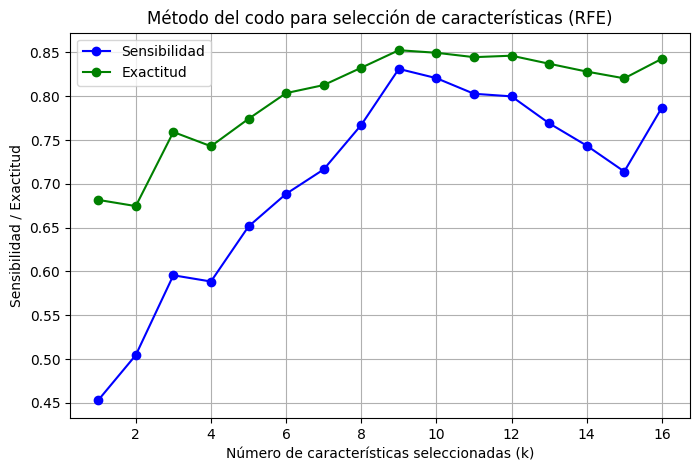

In [30]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

resultados_recall = []
resultados_accuracy = []
num_features = []

# Número total de características
total_features = X_train.shape[1]

# Evaluamos desde 1 hasta todas las características
for k in range(1, total_features + 1):

    # RFE seleccionando k características
    rfe = RFE(RandomForestClassifier(random_state=semilla),
              n_features_to_select=k)

    # Pipeline: RFE + random forest
    model = RandomForestClassifier(random_state=semilla)
    pipeline = Pipeline([('rfe', rfe), ('model', model)])

    # Validación cruzada
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
    scores = cross_validate(pipeline, X_train, y_train, scoring=['recall','accuracy'], cv=cv, n_jobs=-1)
    resultados_recall.append(np.mean(scores['test_recall']))
    resultados_accuracy.append(np.mean(scores['test_accuracy']))
    num_features.append(k)

    print(f"Características: {k}, Sensibilidad: {np.mean(scores['test_recall']):.4f}, Exactitud: {np.mean(scores['test_accuracy']):.4f}")
# --- Gráfica del método del codo ---
plt.figure(figsize=(8,5))
plt.plot(num_features, resultados_recall, color='blue', marker='o')
plt.plot(num_features, resultados_accuracy, color='green', marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Sensibilidad / Exactitud")
plt.legend(["Sensibilidad", "Exactitud"])
plt.title("Método del codo para selección de características (RFE)")
plt.grid(True)
plt.show()

En la gráfica se puede ver, como tanto la sensibilidad como la exactitud, llegan su punto más alto cuando llegan a las 9 características más importantes según random forest, por lo tanto ahora procederemos a ver cuales variables elimina.

In [31]:
n_features_to_select = 9
rfe = RFE(RandomForestClassifier(random_state=semilla), n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


from operator import itemgetter
features = X_train.columns.to_list()
columns_selected = []
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    if x == 1:
        columns_selected.append(y)
    print(x, y)

1 Horas_Sueno
1 Notas_Promedio
1 Numero_Amigos
1 Tiempo_Redes
1 Autoestima
1 Ansiedad
1 Depresion
1 Conflictos_Familiares
1 Tiempo_Internet
2 Actividad_Fisica
3 Ausencias_Escolares
4 Tiempo_Videojuegos
5 Edad
6 Actividades_Extracurr
7 Genero_Masculino
8 Tipo_Centro_Publico


En este caso, vemos como ha eliminado 7 variables, entre las cuales las 3 primeras que ha descartado han sido las 3 variables que veniamos sospechando de la varianza (2) y en la tabla de correlación a la variable objetivo (3), y como luego hemos analizado según los 3 histogramas, por lo tanto decidimos hacer caso a esta técnica y quedarnos con los 9 que ha visto más importante, además de la variable objetivo.

In [32]:
bullying_seleccion = bullying[columns_selected + ['Sufre_Bullying_Si']]
bullying_seleccion.head()

,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Redes,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Sufre_Bullying_Si
0,6.0,5.5,12.0,6.0,1.9,5.7,0.7,2,3.7,False
1,6.8,5.2,2.0,0.9,8.6,8.7,9.4,9,5.8,True
2,8.5,3.5,9.0,6.1,8.8,4.7,6.2,1,6.2,False
3,9.2,6.8,4.0,0.9,3.0,9.3,7.3,9,0.0,True
4,6.6,7.6,2.0,9.6,8.2,2.1,6.8,4,7.4,True


Aquí se puede ver como nos hemos quedado con 10 variables, 9 predictoras y 1 objetivo.

# Balanceo de datos

Primero debemos confirmar si hay desbalanceo real, y saber de cuánta es la diferencia.

In [33]:
from collections import Counter

# Contamos los valores de cada clase de la variable objetivo
counter = Counter(bullying["Sufre_Bullying_Si"])
print(counter)

Counter({False: 1296, True: 704})


Se puede ver que hay un ligero desbalanceo, de 64.8% para los falsos (que ya hemos ido viendo en las matrices de confusión de los modelos) y 35.2% para los verdaderos, para el dataset en general.

In [34]:
# Contamos los valores de cada clase de la variable objetivo
counter = Counter(y_train)
print(counter)

Counter({False: 1037, True: 563})


Como se puede ver, gracias al "stratify=y" en la división train y test, hemos ido conservando el balance de negativos y positivos de nuestro dataset, por lo tanto procederemos a solucionarlo.

Por lo tanto, aplicaremos dos métodos que aumenten la cantidad de datos de la clase minoritaria, y eligiremos el que mejor funcione.

Estos dos métodos son: Borderline-SMOTE y ADASYN.

Borderline-SMOTE: Consiste en añadir instancias en las fronteras, es decir, en los lugares donde más le cuesta al algoritmo decidir si una instancia pertenece a una clase u otra.

ADASYN: Crea instancias de la clase minoritaria en zonas donde hay pocas instancias de la clase minoritaria, y muchas de la clase mayoritaria, reforzando así el aprendizaje de esas zonas.

In [35]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

# Creamos el objeto BorderlineSMOTE y ADASYN, estableciendo la semilla por reproducibilidad
oversample_bsmote = BorderlineSMOTE(random_state=semilla)
oversample_adasyn = ADASYN(random_state=semilla)

# hacemos el cálculo y cambiamos los datos en la parte training
X_train_bsmote, y_train_bsmote = oversample_bsmote.fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn = oversample_adasyn.fit_resample(X_train, y_train)

# Imprimimos la cantidad de datos que pertenece a cada clase
counter_bsmote = Counter(y_train_bsmote)
print(counter_bsmote)
counter_adasyn = Counter(y_train_adasyn)
print(counter_adasyn)

Counter({False: 1037, True: 1037})
Counter({True: 1055, False: 1037})


BorderlineSMOTE nos ha ajustado los dos contadores a la perfección. En cambio, ADASYN nos ha incrementado la clase minoritaria, superando mínimamente la clase mayoritaria, seguramente porque queria cubrir todas las zonas que fuesen complicadas para la clase minoritaria, pero no nos supone ningún problema es ínfimo desbalanceo.

Como se puede ver, hemos creado: X_train_bsmote, y_train_bsmote, X_train_adasyn, y_train_adasyn.

Estos nuevos datos de entrenamiento, los utilizaremos en cada una de las 3 clases donde probaremos la efectividad que tienen en cada uno de ellos, y elegiremos la que mejor funcione.

# Entrenamiento de modelos con datos balanceados

Probaremos las dos técnicas de desbalanceo en cada uno de los 3 modelos

## Decision Tree

### Borderline-SMOTE

In [36]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train_bsmote, y_train_bsmote)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 16
Número de nodos terminales: 202


In [37]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[218  41]
 [ 40 101]]
La exactitud es: 
0.7975
La precisión es:
0.7113
La sensibilidad es:
0.7163
La puntuación F1 es:
0.7138


Se puede ver como la tasa de FN ha aumentado y con ello ha disminuido una vez más, la sensibilidad con respecto al último uso (donde habíamos hecho selección de características), haciendo que el modelo haya empeorado bastante, habiendo aplicado el Borderline-SMOTE.

### ADASYN

In [38]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train_adasyn, y_train_adasyn)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 16
Número de nodos terminales: 197


In [39]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[214  45]
 [ 38 103]]
La exactitud es: 
0.7925
La precisión es:
0.6959
La sensibilidad es:
0.7305
La puntuación F1 es:
0.7128


Aquí se puede ver como aunque haya un empeoramiento, no es tan malo que con B-SMOTE.

## Random Forest

### Borderline-SMOTE

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train_bsmote, y_train_bsmote)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[217  42]
 [ 27 114]]
La exactitud es: 
0.8275
La precisión es:
0.7308
La sensibilidad es:
0.8085
La puntuación F1 es:
0.7677


De nuevo, vemos una gran mejoría con respecto a la anterior pasada, ha pasado de un 75.18% de sensibilidad a un 82.98%, haciendo así que haya sido una mejoría de más del 7.8%, haciéndolo de nuevo el mejor modelo, al menos mejor que DecisionTree (aún falta calcular el ADABOOST). Notar que el método que hemos utilizado aquí es el de Borderline-SMOTE, que antes funcionó mal con árboles de decisiones.

### ADASYN

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train_adasyn, y_train_adasyn)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[215  44]
 [ 23 118]]
La exactitud es: 
0.8325
La precisión es:
0.7284
La sensibilidad es:
0.8369
La puntuación F1 es:
0.7789


Aquí podemos ver, si lo comparamos con el aplicado a Borderline-SMOTE, da resultados ligeramente inferiores, pero no tan grandes como para descartarlo.

## AdaBoost

### Borderline-SMOTE

In [42]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train_bsmote, y_train_bsmote)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[219  40]
 [ 42  99]]
La exactitud es: 
0.795
La precisión es:
0.7122
La sensibilidad es:
0.7021
La puntuación F1 es:
0.7071


Aquí vemos como la sensibilidad de ADABOOST ha empeorado con respecto al anterior ADABOOST, haciendo que se convierta en el peor modelo, aplicando B-SMOTE

### ADASYN

In [43]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train_adasyn, y_train_adasyn)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[214  45]
 [ 38 103]]
La exactitud es: 
0.7925
La precisión es:
0.6959
La sensibilidad es:
0.7305
La puntuación F1 es:
0.7128


Aquí se ve, que aunque mejora con respecto a la técnica de desbalanceo utilizada, sigue siendo peor que la anterior pasada.

Analizando las dos técnicas de desbalanceo en cada modelo:

ADASYN > Borderline-SMOTE en árbol de decisiones.

ADASYN < Borderline-SMOTE en random forest (el mejor modelo hasta el momento).

ADASYN > Borderline-SMOTE en ADABOOST (el peor modelo si aplicamos B-SMOTE).

Por lo tanto hemos pensado en utilizar ADASYN de forma definitiva, ya que aunque funciona mejor Borderline-SMOTE en random forest (tiene 3 mas aciertos en TN) no es nuestra prioridad, que trata sobre disminuir los FN y aumentar la sensibilidad.

In [44]:
X_train = X_train_adasyn
y_train = y_train_adasyn

# Validación cruzada

Como se ha podido ver, en este documento en todas las situaciones aleatorias las hemos hecho fijas con una semilla para tener una reproducibilidad de que los cambios al dataset funcionan sobre nuestros modelos. Pese a esto, utilizar la semilla puede hacer que hayamos tenido suerte en una variedad de situaciones y que el problema funcione maravillosamente bien en esa semilla en particular, pero no en el resto de ocasiones, haciendo que los modelos no resulten ser fiables.

Por todo esto haremos haremos la validación cruzada de nuestros 3 modelos, ya que hará divisiones en k folds, de las cuales estas estaran divididas en train y validación (aunque lo utilizaremos como test en este caso) en cada iteración, haciendo que haya más variedad en entrenamiento y predicción en los modelos. Pero hay que tener en cuenta que lo realizaremos con el conjunto training, esto lo haremos para ver la fiabilidad que tienen nuestros modelos con respecto al preprocesado realizado.

Creamos una funcion que imprima los valores de cross_validate de exactitud, precision, sensibilidad, f1 y sus respectivas desviaciones típicas.

In [45]:
def print_scores(scores, digitos=4):
        print("La exactitud media es:", round(scores['test_accuracy'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_accuracy']), digitos))
        print("La precisión media es:", round(scores['test_precision'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_precision']), digitos))
        print("La sensibilidad media es:", round(scores['test_recall'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_recall']), digitos))
        print("La puntuación F1 media es:", round(scores['test_f1'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_f1']), digitos))

## Decision Tree

Utilizamos nuestro modelo de Decision Tree para comprobar su estabilidad.

In [46]:
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8456 con desviación típica media de: 0.0221
La precisión media es: 0.8553 con desviación típica media de: 0.0135
La sensibilidad media es: 0.8351 con desviación típica media de: 0.045
La puntuación F1 media es: 0.8445 con desviación típica media de: 0.0263


Podemos ver como tenemos una sensibilidad del 84.64%, haciéndonos ver que nuestro modelo con este preprocesado, parece funcionar de manera bastante estable.

## Random Forest

In [47]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8824 con desviación típica media de: 0.0102
La precisión media es: 0.8628 con desviación típica media de: 0.0199
La sensibilidad media es: 0.9137 con desviación típica media de: 0.0441
La puntuación F1 media es: 0.8865 con desviación típica media de: 0.0131


La sensibilidad en Random Forest es de 91.09% mostrandonos que funciona muy bien este modelo con este preprocesado, haciendo que, de nuevo, sea el mejor modelo de los 3.

## AdaBoost

In [48]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8451 con desviación típica media de: 0.0286
La precisión media es: 0.8493 con desviación típica media de: 0.0156
La sensibilidad media es: 0.8417 con desviación típica media de: 0.0529
La puntuación F1 media es: 0.8449 con desviación típica media de: 0.0332


La sensibilidad es del 83.7%, haciendo que aunque funciona peor que decision tree, sigue funcionando bastante bien.

# Búsqueda de hiperparámetros

Para la busqueda de hiperparámetros utilizaremos RandomizedSearch, ya que va probando distintas combinaciones al azar de forma muy rápida, por lo tanto pensemos que sería el más interesante a la hora de ver la fiabilidad.

## Decision Tree

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )

# Hiperparámetros que se irán probando, siguiendo al estructura, nombredemodelocreado__hiperparametroamodificar
param_tree = {
    'criterion': ['gini', 'entropy'],           # Función para medir la impureza
    'max_depth': randint(3, 16),                # Profundidad del árbol entre 3 y 16
    'min_samples_split': randint(2, 16),        # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12),         # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]      # Número de features considerados en cada split
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_tree = RandomizedSearchCV(
    treeC,                                          # Modelo que buscamos mejorar
    param_tree,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_tree.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_tree.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
obtencion_metricas_clasificacion(X_test, grid_tree.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 8}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8633 con desviación típica media de: 0.0111
La precisión media es: 0.8467 con desviación típica media de: 0.0082
La sensibilidad media es: 0.89 con desviación típica media de: 0.0168
La puntuación F1 media es: 0.8678 con desviación típica media de: 0.0113
Resultados en el conjunto de test:
La matriz de confusión es:
[[217  42]
 [ 23 118]]
La exactitud es: 
0.8375
La precisión es:
0.7375
La sensibilidad es:
0.8369
La puntuación F1 es:
0.7841


Podemos ver como aplicando búsqueda de hiperparámetros a través de RandomizedSearchCV tenemos un aumento importante en cuanto a la sensibilidad del modelo, pasando de un 72.44% a un 89.76% de sensibilidad de media.

## Random Forest

In [50]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Hiperparámetros que se irán probando, siguiendo al estructura, nombredemodelocreado__hiperparametroamodificar
param_rf = {
    'n_estimators': randint(100, 500),         # número de árboles aleatorio entre 100 y 500
    'max_depth': randint(3,16),                # profundidad máxima entre 3 y 16
    'max_features': ['sqrt', 'log2', None],    # estrategia de selección de features
    'criterion': ['gini', 'entropy'],          # función para medir la impureza
    'min_samples_split': randint(2, 16),       # mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12)         # mínimo de muestras por hoja
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_rf = RandomizedSearchCV(
    rf,                                             # Modelo que buscamos mejorar
    param_rf,                                       # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_rf.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_rf.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_rf.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
obtencion_metricas_clasificacion(X_test, grid_rf.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 176}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8867 con desviación típica media de: 0.0148
La precisión media es: 0.8603 con desviación típica media de: 0.0177
La sensibilidad media es: 0.9261 con desviación típica media de: 0.0146
La puntuación F1 media es: 0.8919 con desviación típica media de: 0.0137
Resultados en el conjunto de test:
La matriz de confusión es:
[[215  44]
 [ 10 131]]
La exactitud es: 
0.865
La precisión es:
0.7486
La sensibilidad es:
0.9291
La puntuación F1 es:
0.8291


Vemos como pasamos de un 85.5% a un 92.9%, otro gran aumento que hace que Random Forest sea el mejor modelo de los aplicados para nuestra práctica.

## AdaBoost

In [51]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Espacio de búsqueda de hiperparámetros
param_ab = {
    # Parámetros de cada árbol de decisión que estarán anidados dentro al AdaBoost, en el cual serán mas simples que el modelo de árbol de decisión
    'estimator__max_depth': randint(3, 7),            # Profundidad del árbol entre 3 y 7
    'estimator__min_samples_split': randint(2, 9),    # Número mínimo de muestras para dividir
    'estimator__criterion': ['gini', 'entropy'],      # Función para medir la impureza

    # Parámetros del propio AdaBoost
    'n_estimators': randint(50, 250),                 # Cantidaad de árboles de decisión que utilizará AdaBoost
    'learning_rate': uniform(0.01, 1.0)               # Controla la fuerza de corrección
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_ab = RandomizedSearchCV(
    adaboost,                                       # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_ab,                                       # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_ab.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_ab.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
obtencion_metricas_clasificacion(X_test, grid_ab.best_estimator_, y_test)

Mejores parámetros: {'estimator__criterion': 'gini', 'estimator__max_depth': 6, 'estimator__min_samples_split': 5, 'learning_rate': np.float64(0.8854568417951749), 'n_estimators': 153}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8843 con desviación típica media de: 0.0151
La precisión media es: 0.8593 con desviación típica media de: 0.0214
La sensibilidad media es: 0.9232 con desviación típica media de: 0.046
La puntuación F1 media es: 0.8891 con desviación típica media de: 0.0168
Resultados en el conjunto de test:
La matriz de confusión es:
[[216  43]
 [ 28 113]]
La exactitud es: 
0.8225
La precisión es:
0.7244
La sensibilidad es:
0.8014
La puntuación F1 es:
0.7609


Pasamos de un 72.44% a un 88.06%, haciendo que tenga un gran aumento en su sensibilidad, quedándose por debajo de Random Forest, y de Decision Tree.

# Conclusión

Después de haber realizado todo el preprocesado, y haber hecho un pipeline con cada modelo, y habiendo aplicado balanceo con ADASYN, realizado búsqueda de hiperparámetros con RandomizedSearchCV, que nos permite hacer una amplia búsqueda de hiperparámetros de una manera rápida y precisa, y aplicando validación cruzada sobre los mejores estimadores de cada modelo por separado, se demuestran sus verdaderos rendimientos, quitando peso al valor del azar.

Con respecto a nuestro mejor modelo, elegimos Random Forest, puesto que aunque el modelo empezó siendo el peor de los 3, con una sensibilidad del 70.21% con un preprocesado base, luego mojoró hasta ser el mejor modelo de los 3, con un 75.18% después del preprocesado, luego con el balanceo con B-SMOTE y ADASYN, resultó en otra mejoría hasta del 82.27%. Más tarde, podemos ver que al aplicarle validación cruzada a través de un pipeline, mejora a un 85.5%, haciendo ver que también parece un modelo bastante fiable. Por último, al realizar la búsqueda de hiperparámetros con RandomizedSearchCV y al realizarle validación cruzada, tenemos una sensibilidad media del 92.9%, y una desviación típica media del 1.28%, haciendo ver que en el peor de los casos, sigue teniendo una fiabilidad del 91.62%, un rango de sensibilidad que es muy apreciable para la lucha contra el bullying.

Nuestro segundo mejor modelo, hemos elegido Decision Tree, que aunque empezó siendo de los mejores con un 75.89% de sensibilidad con preprocesado base, siendo uno de los mejores junto con AdaBoost, pasó a un 74.47% de sensibilidad con preprocesado, notándose un ligero empeotamiento y convirtiéndose en segundo mejor modelo, luego con el balanceo de datos de ADASYN empeoró a un 70.21%, pasando a ser el peor modelo de los tres, luego con validación cruzada aplicada a su pipeline, aumentó a un 73.16%. El modelo demuestra un gran aumento de nuevo a un 89.76% siendo una mejoría del 16.6%, y una desviación típica media de 4.32%, haciendo esto que en la peor de las situaciones, nuestro modelo tenga una fiabilidad del 85.44%, más baja que Random Forest, a una distancia considerable.

Con respecto a nuestro peor modelo, AdaBoost, empezó siendo uno de los mejores modelos con un 75.89% de sensibilidad con un preprocesado base, tuvo un ligero empeoramiento a 73.05% con preprocesado, bajando su valor ya a ser el peor modelo, luego empeoró de nuevo cuando se le aplicó el balanceo de datos con ADASYN, dando como resultado una sensibilidad del 70.92%, siendo el segundo peor modelo, luego al aplicar validación cruzada a través del pipeline mejoró su sensibilidad media a un 72.44%, y por último, al hacer búsqueda de hiperparámetros con RandomizedSearchCV, pasó a  de nuevo el peor modelo, pese a su mejoría, hasta un 88.06%, y una desviación típica del 6.56%, haciendo que en su peor caso según la variabilidad observada, el modelo funcione con una fiabilidad del 81.5%, bastante por debajo del 91.62% de Random Forest, y del 85.44% de Decision Tree.

En resumen, Random Forest ha demostrado que posee el mejor valor de sensibilidad media con un 92.9%, haciendo que sea muy eficaz en nuestro objetivo de la lucha contra el bullying, además de poseer una desviación típica media del 1.28% que demuestra que el modelo dispone de una estabilidad muy robusta. Decision Tree es otra alternativa interesante, pues con una sensibilidad media del 89.76% demuestra también ser un modelo muy eficaz, pero con una desviación típica del 4.32%, que pese a no ser un valor grande, hace que el modelo pierda un poco de estabilidad, y así ofrezca menos confianza que Random Forest. AdaBoost también demuestra ser un modelo bastante competitivo de 88.06% de sensibilidad media, siendo casi tan eficaz como los otros dos modelos, aunque con una desviación típica ya bastante notable del 6.56%, haciendo que sea bastante menos estable que los otros dos modelos, pese a ser casi tan eficaz como ellos.

Por lo general, como hemos visto, dos de nuestros modelos empeoran con el balanceo de ADASYN, excepto Random Forest, nuestro mejor modelo. Realizamos también búsqueda de hiperparámetros y con la validación cruzada, haciendo que nuestro modelo final sea eficaz y fiable. Si pudiésemos tener más datos, utilizásemos otros modelos, así como modelos de ensamble, y si hiciésemos otra selección de características, podríamos mejorar la predicción de nuestros modelos, y así poder apoyar la lucha contra el bullying.

| Etapa                                     | Mejor → Peor                              |
|-------------------------------------------|--------------------------------------------|
| Preprocesado básico                       | Decision Tree ≈ AdaBoost > Random Forest   |
| Preprocesado completo                     | Random Forest > Decision Tree > AdaBoost   |
| Balanceo de datos (ADASYN)                | Random Forest > AdaBoost > Decision Tree   |
| Validación cruzada con pipeline           | Random Forest > Decision Tree > AdaBoost   |
| Búsqueda de hiperparámetros (Randomized)  | Random Forest > Decision Tree > AdaBoost   |


# Consultas IA Generativa

**Prompt:** puedes hacerme un histograma en notebook jupyter donde se pueda ver la distribucion de valores de una variable con respecto a la variable objetivo?

**Respuesta:**
```Python
# Importamos librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df
# 'variable' es la columna que quieres analizar
# 'objetivo' es la columna objetivo

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='variable', hue='objetivo', multiple='stack', kde=False)
plt.title('Distribución de "variable" según "objetivo"')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()
```

**Validación y cambios:** Se utilizó para implementar los histogramas de la sección de "Selección de características", en el cual se modifico algunos valores para adaptarlo a nuestro código

# Librerías utilizadas

In [52]:
# Librerrías con la que se ha realizado el notebook
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
imblearn    0.14.0
matplotlib  3.10.6
numpy       2.3.3
pandas      2.3.3
scipy       1.16.2
seaborn     0.13.2
sinfo       0.3.4
sklearn     1.7.2
-----
IPython             9.6.0
jupyter_client      8.6.3
jupyter_core        5.8.1
jupyterlab          4.4.9
notebook            7.4.7
-----
Python 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Windows-10-10.0.26100-SP0
16 logical CPU cores, AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
-----
Session information updated